In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

# Generate data

In [2]:
n = 12
x = np.random.normal(size=(n, 2))

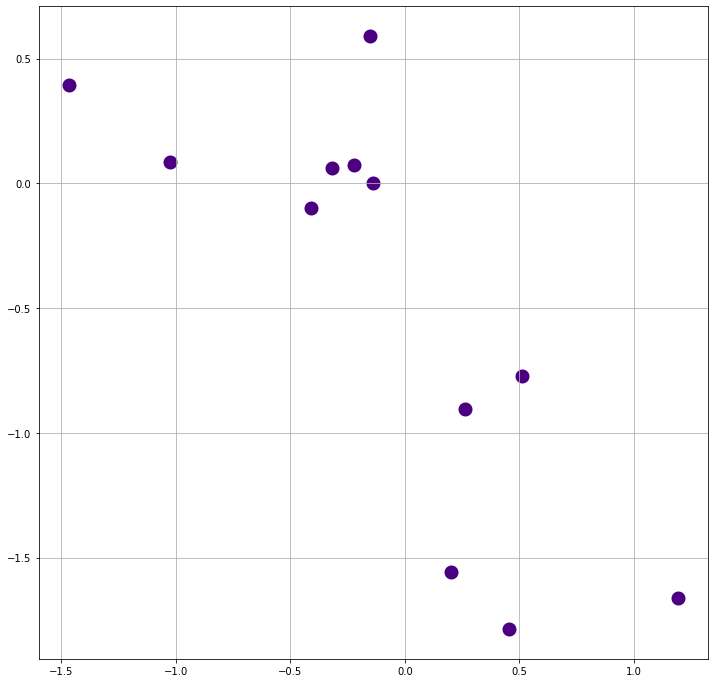

In [3]:
plt.figure(figsize=(12, 12))
plt.scatter(x[:, 0], x[:, 1], color='indigo', linewidths=8)
plt.grid(True)
plt.show()

# Find interesting radiuses

In [4]:
distance = x[:]*np.ones([x.shape[0], x.shape[0], 2])
distance = distance - np.transpose(distance, axes=(1, 0, 2))
distance = np.linalg.norm(distance, axis=2)
distance[:4, :4]

array([[0.        , 1.6982226 , 0.70907444, 1.12573463],
       [1.6982226 , 0.        , 2.04985911, 0.65663603],
       [0.70907444, 2.04985911, 0.        , 1.62568811],
       [1.12573463, 0.65663603, 1.62568811, 0.        ]])

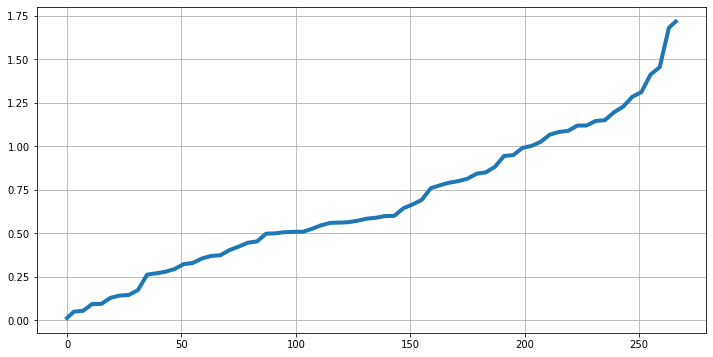

In [5]:
n_radius_cloned = 4
radiuses = 0.5*np.unique(distance[distance != 0])
radiuses = np.repeat(radiuses, n_radius_cloned)
radius_last = radiuses[-1] + radiuses[0]
radiuses = np.array(
    [
        np.concatenate([np.zeros(i), radiuses, radius_last*np.ones(n_radius_cloned-1-i)]) for i in range(n_radius_cloned)
    ]
)
radiuses = np.sum(radiuses, axis=0)/n_radius_cloned

plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(radiuses)), radiuses, linewidth=4)
plt.grid(True)
plt.show()

# Generate pics

In [6]:
filename = 'just_radius_growth'

In [1]:
points_number = 120
circle_cos = np.cos(2*np.pi*np.arange(points_number+1)/points_number)
circle_sin = np.sin(2*np.pi*np.arange(points_number+1)/points_number)

for r in radiuses:
    plt.figure(figsize=(12, 12))
    for i in range(x.shape[0]):
        p = x[i]
        plt.plot(p[0] + r*circle_cos, p[1] + r*circle_sin, color='orchid')
        plt.scatter(p[0], p[1], color='indigo', linewidth=8)
    plt.grid(True)
    plt.savefig('pics/' + filename + '_' + str(n) + '_' + str(r).replace('.', '_') + '.png')

NameError: name 'np' is not defined

In [2]:
images = [imageio.imread('pics/' + filename + '_' + str(n) + '_' + str(r).replace('.', '_') + '.png') for r in radiuses]
imageio.mimsave(filename + '_' + str(n) + '.gif', images)

NameError: name 'radiuses' is not defined